### Evolutionary Computing ,  HW3 :  Multi dimensional function op timization

#### Import Dependencies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from configparser import ConfigParser
import seaborn as sns
from matplotlib.lines import Line2D


In [2]:
file = "ackley_n5.ini"
config = ConfigParser()
config.read(file)

for section in config.sections():
    for key, value in config[section].items():
        exec(f"{key} = {value}")


#### Initial Population

In [3]:
def initial_population(low, high, pop_size, dim):
    population = []
    for _ in range(pop_size):
        individual = [
            np.random.uniform(low, high, size=dim),
            np.random.uniform(high)
        ]
        population.append(individual)
    return np.array(population, dtype=object)
population = initial_population(low, high, population_size, dim)


#### Functions


In [4]:
def schwefel(x):
    alpha = 418.9829
    n = len(x)
    return alpha * n - np.sum(x * np.sin(np.sqrt(np.abs(x))))

def ackley(x):
    x = np.asarray(x)
    n = len(x)
    sum_sq_terms = np.sum(x ** 2)
    cos_terms = np.cos(2 * np.pi * x)
    return -20 * np.exp(-0.2 * np.sqrt(sum_sq_terms / n)) - np.exp(np.sum(cos_terms) / n) + 20 + np.exp(1)

#### Fitness

In [5]:
def schwefel_fitness(population):
    return [schwefel(individual[0]) for individual in population]

def ackley_fitness(population):
    return [ackley(individual[0]) for individual in population]


#### Parent Selection


In [6]:
def parent_selection(population, num_parents):
    selected_parents = np.random.choice(len(population), size=num_parents, replace=False)
    return population[selected_parents]

#### Recombination

In [7]:
def local_intermediary(parents):
    chromosome_size = len(parents[0])
    child = np.zeros(chromosome_size)
    child = np.mean(parents, axis=0)
    return child

#### Mutation


In [8]:
def mutation(child, dim=2):
    x, sigma = child
    tau = 1 / np.sqrt(2 * dim)
    tau_prime = 1 / np.sqrt(2 * np.sqrt(dim))
    term1 = np.random.normal(0,tau)
    term2 = np.random.normal(0,tau_prime)
    term3 = term1 + term2
    sigma_star = sigma * np.exp(term3)
    mutated_x = x + np.random.normal(0, sigma_star)
    return np.array([mutated_x, sigma_star], dtype=object)

def non_adaptive_mutation(child, fixed_sigma=0.1, dim=2, low=-500, high=500):
    x, sigma = child
    sigma_star = fixed_sigma
    mutated_x = x + np.random.normal(0, np.abs(sigma_star))
    mutated_x = np.clip(mutated_x, low, high)
    return np.array([mutated_x, sigma_star], dtype=object)


#### Survival Selection

In [9]:
def generational_selection(population, children):
    if fit == "schwefel":
        fitness_values = schwefel_fitness(children)
    elif fit == "ackley":
        fitness_values = ackley_fitness(children)
    else:
        print("Please Enter Correct Value for survival selection")

    combined_population = np.vstack([population, children])

    if fit == "schwefel":
        fitness_values_combined = schwefel_fitness(combined_population)
    elif fit == "ackley":
        fitness_values_combined = ackley_fitness(combined_population)
    else:
        print("Please Enter Correct Value for survival selection")

    best_indices = np.argsort(fitness_values_combined)[:len(population)]
    new_population = combined_population[best_indices]

    return np.array(new_population)



def elitist_selection(population, children, survivors=100):

    combined_population = np.vstack([population, children])

    if fit == "schwefel" :
        fitness_values = schwefel_fitness(combined_population)
    elif fit == "ackley":
        fitness_values = ackley_fitness(combined_population)
    else:
        print("Please Enter Correct Value")

    best_indices = np.argsort(fitness_values)[:survivors]
    new_population = combined_population[best_indices]
    return np.array(new_population)



#### Offsprings

In [10]:
def valid_child(child, low, high):
    x, _ = child
    return np.all((low <= x) & (x <= high))

def offsprings(population):
    
    children = []
# -----------------------OFFSPRINGS------------------------

    while len(children) < len(population) * 7:

        # -----------------------PARENT------------------------

        if parent_selections == "on":
            child = parent_selection(population, 2)
        else:
            child = population
        
        # -----------------------CROSS-----------------------

        if recombination == "on":
            child = local_intermediary(child)
        else:
            child = child[0]

        # -----------------------MUTATION------------------------
            
        if mutate == "adaptive":
            child = mutation(child)
        elif mutate == "non adaptive":
            child = non_adaptive_mutation(child)
  

        # -----------------------CHECK VALID CHILD------------------------

        if valid_child(child, low, high):
            children.append(child)

    return np.array(children)

### ES Alogorithm

In [11]:
def es():

    # -----------------------INITIAL POPULATION------------------------

    population = initial_population(low, high, population_size, dim)


    # -----------------------FITNESS------------------------

    if fit == "schwefel":
        first_fitness = schwefel_fitness(population)
    elif fit == "ackley":
        first_fitness = ackley_fitness(population)
    else:
        print("Please Enter Correct Value")

    # -----------------------MAX & AVG------------------------

    max_fit = []
    avg_fit = []
    min_fit = []


    # -----------------------ES LOOP------------------------

    for generation in range(generations):

        # -----------------------OFFSPRINGS------------------------

        children = offsprings(population)

        # -----------------------SURVIVAL SELECTION------------------------
        
        if survival_selection == "generational":
            population = generational_selection(population, children)
        elif survival_selection == "elitist":
            population = elitist_selection(population, children, survivors=100)
        else:
            print("Please Enter Survival Selection Method !")

         # -----------------------FITNESS------------------------

        if fit == "schwefel":
            fitness_values = schwefel_fitness(population)
        elif fit == "ackley":
            fitness_values = ackley_fitness(population)
        else:
            print("Please Enter Correct Value")

        max_fit.append(np.max(fitness_values))
        avg_fit.append(np.mean(fitness_values))
        min_fit.append(np.min(fitness_values))


        # -----------------------THRESHOLD------------------------

        if np.min(fitness_values) <= threshold:
            break

    # -----------------------RESULT & PLOT------------------------
        
    print(
        f"""Generation * {generation + 1} *     Best Fitness: {max_fit[-1]}     Average Fitness: {avg_fit[-1]}""")
  
    return max_fit[-1], avg_fit[-1], min_fit[-1], max_fit, avg_fit, min_fit, population


#### Plot & Report Result

********* RUN : 1 ***********
Generation * 200 *     Best Fitness: 0.050870530020795446     Average Fitness: 0.05087053002079525
********* RUN : 2 ***********
Generation * 200 *     Best Fitness: 0.1058561852069606     Average Fitness: 0.10585618520661086
********* RUN : 3 ***********
Generation * 200 *     Best Fitness: 0.07323369631393861     Average Fitness: 0.07323354606651765
********* RUN : 4 ***********
Generation * 200 *     Best Fitness: 0.004799299599075102     Average Fitness: 0.0047992995925350175
********* RUN : 5 ***********
Generation * 200 *     Best Fitness: 0.0017276426763221941     Average Fitness: 0.00172764267389665
********* RUN : 6 ***********
Generation * 200 *     Best Fitness: 0.02049713185493518     Average Fitness: 0.02049713111442058
********* RUN : 7 ***********
Generation * 200 *     Best Fitness: 0.0021518031839744545     Average Fitness: 0.0021518025064663784
********* RUN : 8 ***********
Generation * 200 *     Best Fitness: 0.04082945581317121     Aver

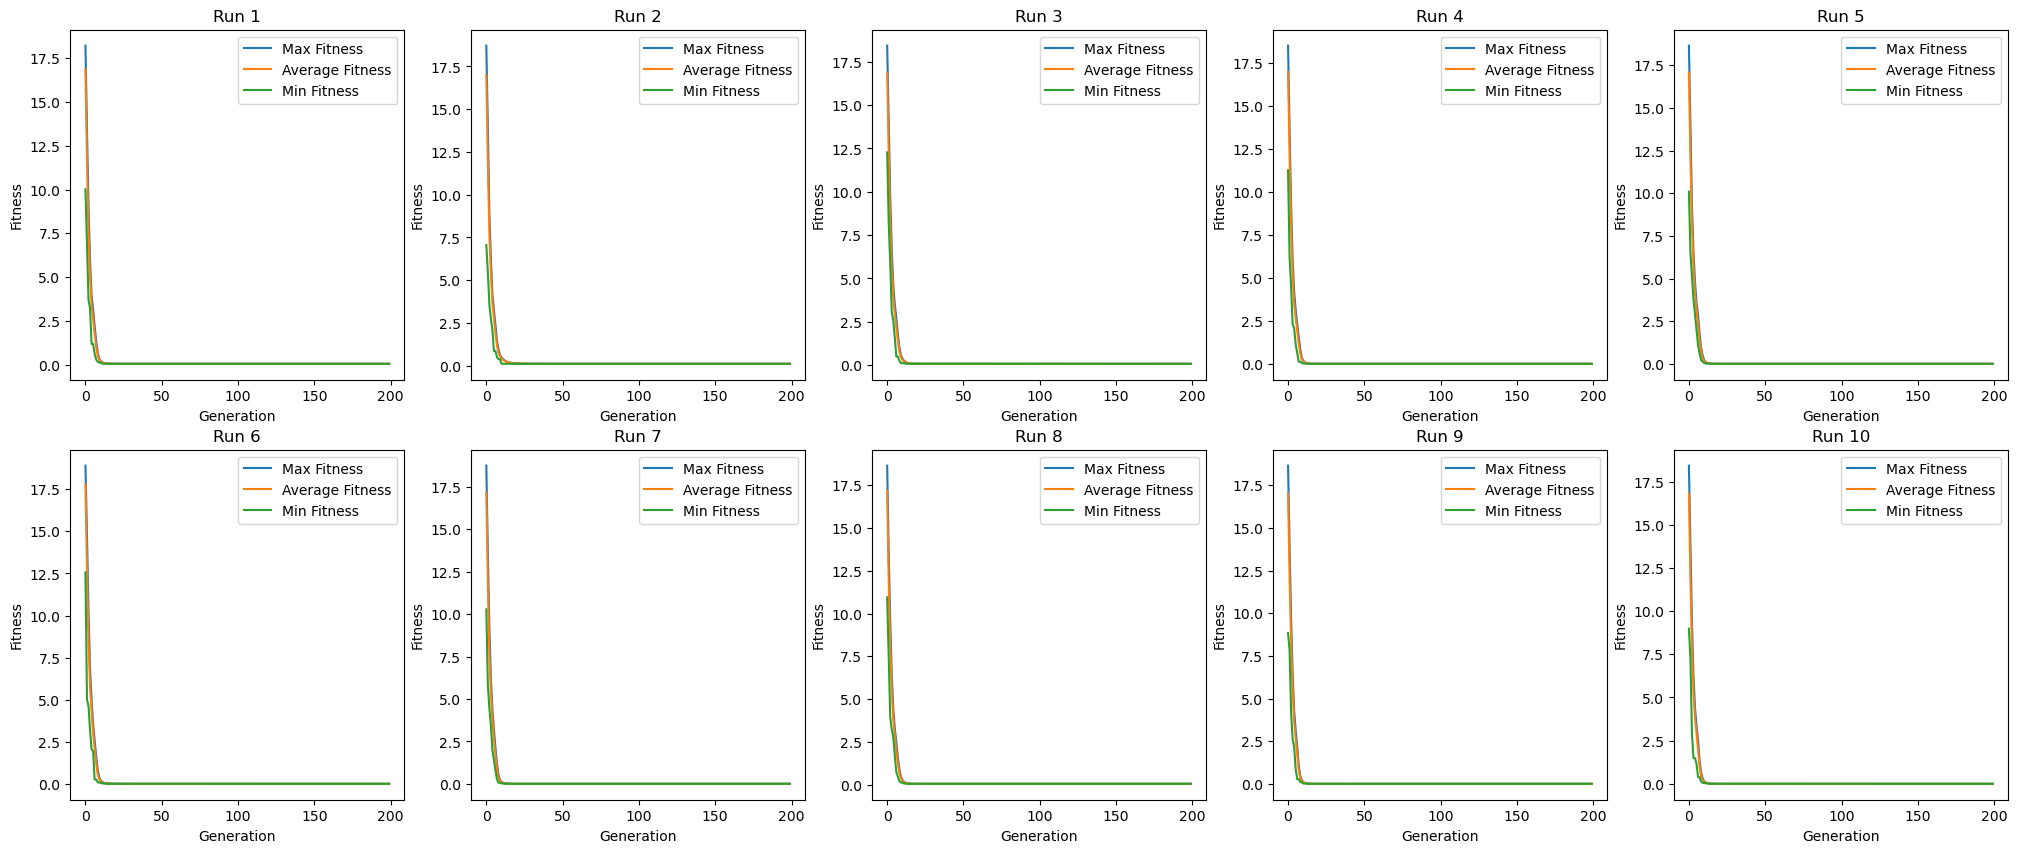

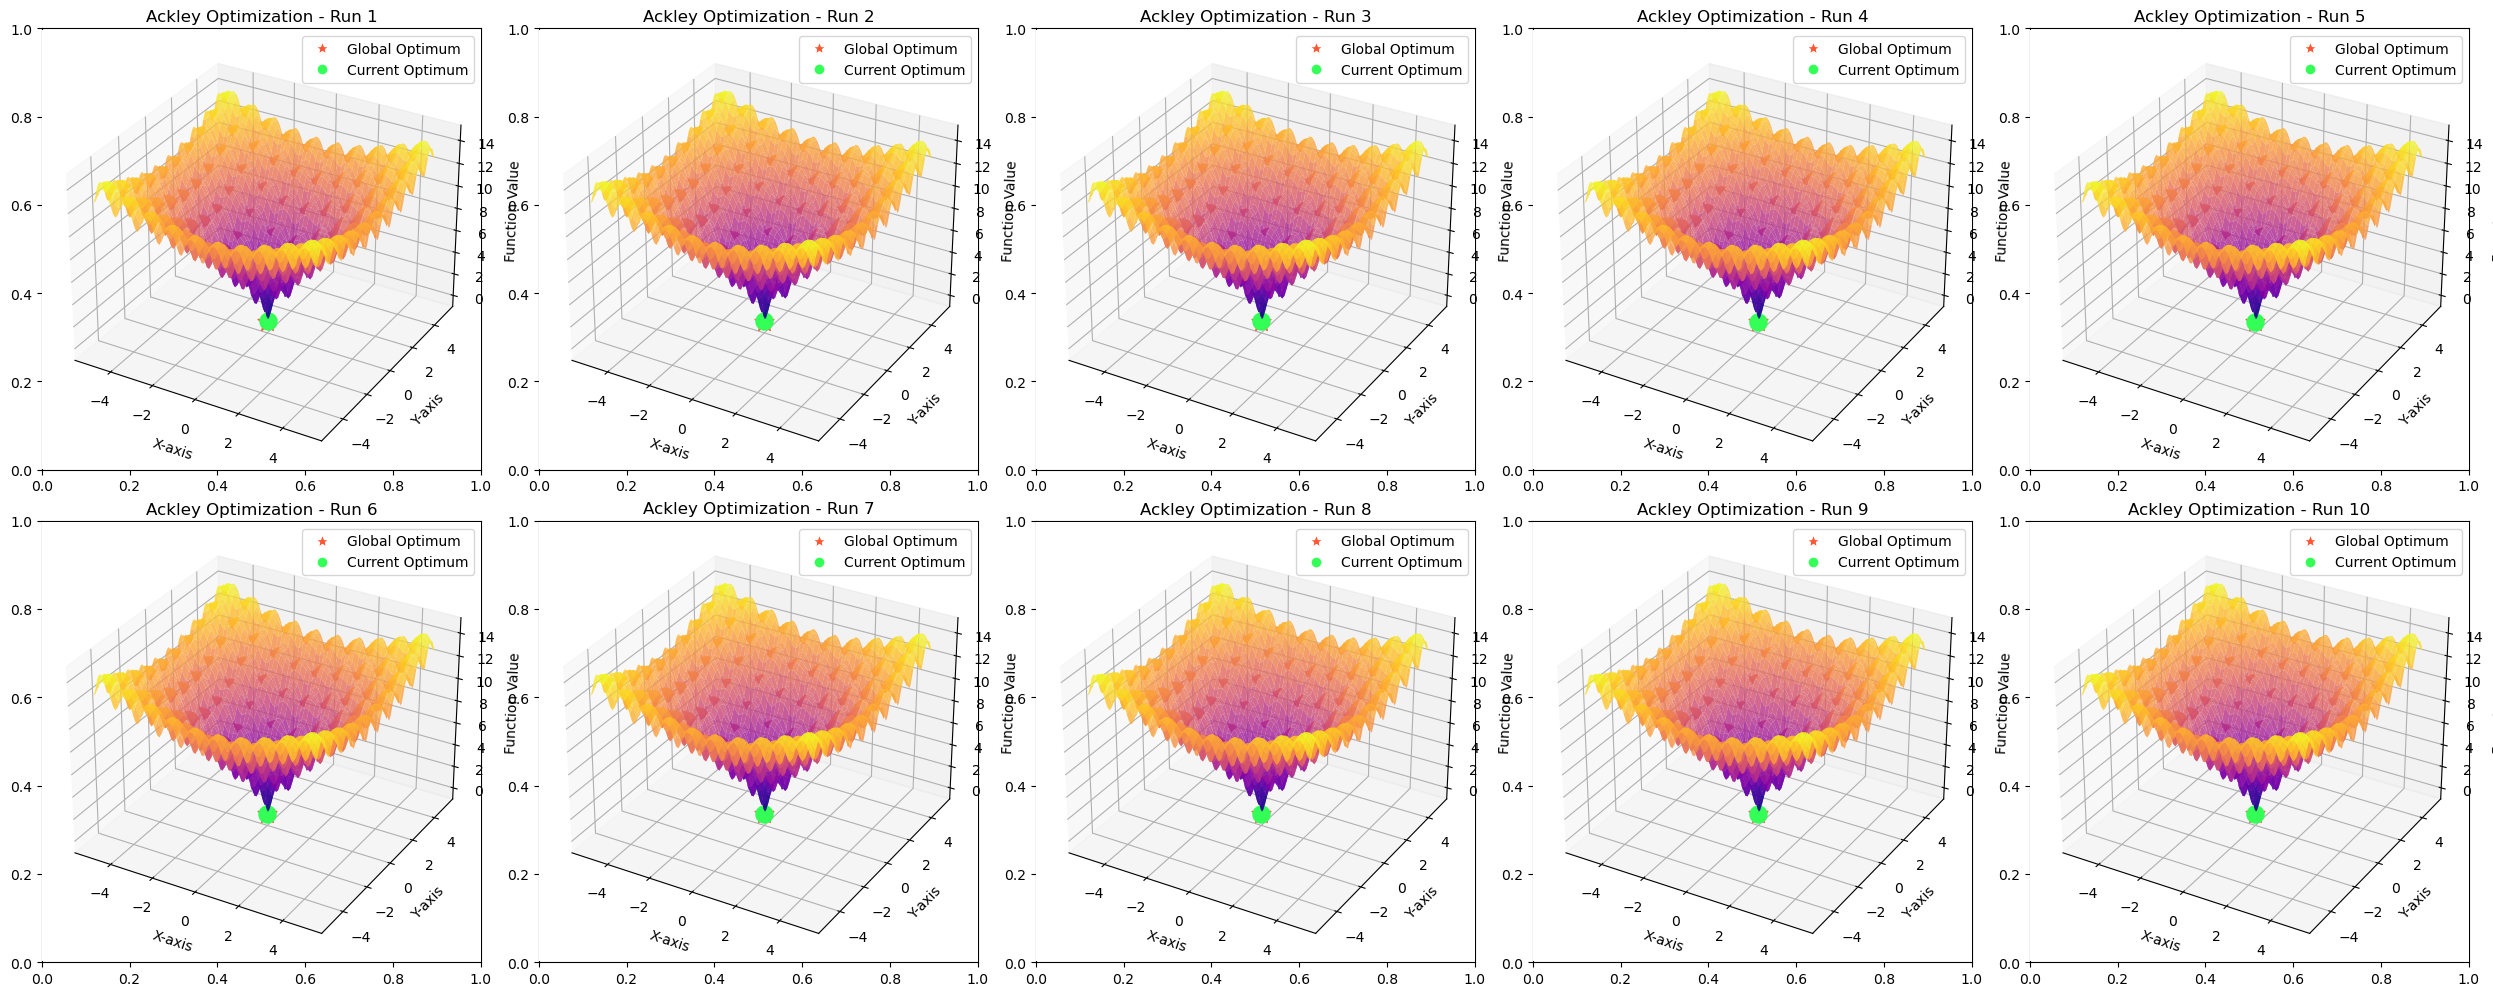

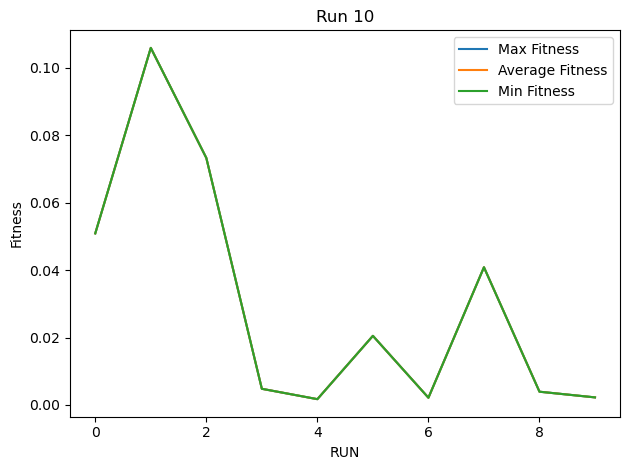

In [12]:

max_fit_all = []
avg_fit_all = []
min_fit_all = []

max_fit = []
avg_fit = []
min_fit = []



fig1, axs1 = plt.subplots(2, num_of_run // 2, figsize=(5 * num_of_run // 2, 10))
axs1 = axs1.flatten()

if fit == "schwefel":

    fig2, axs2 = plt.subplots(2, num_of_run // 2, figsize=(5 * num_of_run // 2, 10))
    axs2 = axs2.flatten()

elif fit == "ackley":

    fig2, axs2 = plt.subplots(2, num_of_run // 2, figsize=(5 * num_of_run // 2, 10))
    axs2 = axs2.flatten()


for i in range(num_of_run):

    print(f"********* RUN : {i + 1} ***********")

    max_fit_es, avg_fit_es, min_fit_es, max_generation, avg_genertion, min_generation, current_population = es()

    max_fit.append(max_fit_es)
    avg_fit.append(avg_fit_es)
    min_fit.append(min_fit_es)

    max_fit_all.append(max_generation)
    avg_fit_all.append(avg_genertion)
    min_fit_all.append(min_generation)

    # Max, Avg, Min Fitness
    axs1[i].plot(range(len(max_generation)), max_generation, label='Max Fitness')
    axs1[i].plot(range(len(avg_genertion)), avg_genertion, label='Average Fitness')
    axs1[i].plot(range(len(min_generation)), min_generation, label='Min Fitness')

    axs1[i].set_xlabel('Generation')
    axs1[i].set_ylabel('Fitness')
    axs1[i].legend()
    axs1[i].set_title(f'Run {i + 1}')

    # Plot the Schwefel function for the current run
    if fit == "schwefel":
        ax = axs2[i]
        x_range, y_range = np.linspace(-500, 500, 100), np.linspace(-500, 500, 100)
        X, Y = np.meshgrid(x_range, y_range)

        Z = np.array([schwefel([x, y]) for x, y in zip(X.flatten(), Y.flatten())]).reshape(X.shape)

        global_optimum = np.array([420.9687, 420.9687])
        optimum_value = schwefel(global_optimum)

        ax = fig2.add_subplot(2, num_of_run // 2, i + 1, projection='3d')  # Use add_subplot to ensure 3D projection
        surf = ax.plot_surface(X, Y, Z, cmap="plasma", edgecolor="none", alpha=0.8)

        ax.scatter(
            global_optimum[0],
            global_optimum[1],
            optimum_value,
            color="#FF5733",
            marker="*",
            s=200,
            label="Global Optimum",
        )

        current_optimum = current_population[np.argmin(schwefel_fitness(current_population))][0]
        ax.scatter(
            current_optimum[0],
            current_optimum[1],
            schwefel(current_optimum),
            color="#33FF57",
            marker="o",
            s=150,
            label="Current Optimum",
        )

        ax.set_xlabel("X-axis")
        ax.set_ylabel("Y-axis")
        ax.set_zlabel("Function Value")
        ax.set_title(f"Schwefel Optimization - Run {i + 1}")

        legend_elements = [
            Line2D([0], [0], marker='*', color='w', label='Global Optimum', markerfacecolor='#FF5733', markersize=10),
            Line2D([0], [0], marker='o', color='w', label='Current Optimum', markerfacecolor='#33FF57', markersize=8),
        ]
        ax.legend(handles=legend_elements)
    # Plot the Ackley function for the current run
    elif fit == "ackley":
        
        ax = axs2[i]
        x_range, y_range = np.linspace(-5, 5, 100), np.linspace(-5, 5, 100)
        X, Y = np.meshgrid(x_range, y_range)

        Z = np.array([ackley([x, y]) for x, y in zip(X.flatten(), Y.flatten())]).reshape(X.shape)

        global_optimum = np.array([0, 0])
        optimum_value = ackley(global_optimum)

        ax = fig2.add_subplot(2, num_of_run // 2, i + 1, projection='3d')  # Use add_subplot to ensure 3D projection
        surf = ax.plot_surface(X, Y, Z, cmap="plasma", edgecolor="none", alpha=0.8)

        ax.scatter(
            global_optimum[0],
            global_optimum[1],
            optimum_value,
            color="#FF5733",
            marker="*",
            s=200,
            label="Global Optimum",
        )

        current_optimum = current_population[np.argmin(ackley_fitness(current_population))][0]
        ax.scatter(
            current_optimum[0],
            current_optimum[1],
            ackley(current_optimum),
            color="#33FF57",
            marker="o",
            s=150,
            label="Current Optimum",
        )

        ax.set_xlabel("X-axis")
        ax.set_ylabel("Y-axis")
        ax.set_zlabel("Function Value")
        ax.set_title(f"Ackley Optimization - Run {i + 1}")

        legend_elements = [
            Line2D([0], [0], marker='*', color='w', label='Global Optimum', markerfacecolor='#FF5733', markersize=10),
            Line2D([0], [0], marker='o', color='w', label='Current Optimum', markerfacecolor='#33FF57', markersize=8),
        ]
        ax.legend(handles=legend_elements)



    if i == num_of_run - 1 :
        print("################################################")
        print(f"max fit average for {num_of_run} runs: {np.mean(max_fit)}")
        print(f"avg fit average for {num_of_run} runs: {np.mean(avg_fit)}")
        print("################################################")

plt.tight_layout()
plt.show()

max_fit = np.array(max_fit)
avg_fit = np.array(avg_fit)
min_fit = np.array(min_fit)

plt.figure()  
plt.plot(range(len(max_fit)), max_fit, label='Max Fitness')
plt.plot(range(len(avg_fit)), avg_fit, label='Average Fitness')
plt.plot(range(len(min_fit)), min_fit, label='Min Fitness')

plt.xlabel('RUN')
plt.ylabel('Fitness')
plt.legend()
plt.title(f'Run {i + 1}')
plt.tight_layout()


In [13]:
#For 1 plot


# # -----------------------ACKLEY------------------------

# def plot_ackley(population):
#     x_range = np.linspace(-5, 5, 100)
#     y_range = np.linspace(-5, 5, 100)
#     X, Y = np.meshgrid(x_range, y_range)
#     Z = np.zeros_like(X)

#     for i in range(X.shape[0]):
#         for j in range(X.shape[1]):
#             Z[i, j] = ackley([X[i, j], Y[i, j]])

#     global_optimum = np.array([0, 0])
#     optimum_value = ackley(global_optimum)

#     fig = plt.figure(figsize=(10, 8))
#     ax = fig.add_subplot(111, projection="3d")

#     surf = ax.plot_surface(X, Y, Z, cmap="plasma", edgecolor="none", alpha=0.8)

#     ax.scatter(global_optimum[0], global_optimum[1], optimum_value, color="#FF5733", marker="*", s=200, label="Global Optimum")

#     current_optimum = population[np.argmin(ackley_fitness(population))][0]
#     ax.scatter(current_optimum[0], current_optimum[1], ackley(current_optimum), color="#33FF57", marker="o", s=150, label="Current Optimum")

#     ax.set_xlabel("X-axis")
#     ax.set_ylabel("Y-axis")
#     ax.set_zlabel("Function Value")
#     ax.set_title("Ackley Function with Global and Current Optima")

#     ax.legend()
#     plt.show()

# # -----------------------SCHWEFEL------------------------
    
# def plot_schwefel(population):
#     x_range = np.linspace(-500, 500, 100)
#     y_range = np.linspace(-500, 500, 100)
#     X, Y = np.meshgrid(x_range, y_range)
#     Z = np.zeros_like(X)

#     for i in range(X.shape[0]):
#         for j in range(X.shape[1]):
#             Z[i, j] = schwefel([X[i, j], Y[i, j]])

#     global_optimum = np.array([420.9687, 420.9687])
#     optimum_value = schwefel(global_optimum)

#     fig = plt.figure(figsize=(10, 8))
#     ax = fig.add_subplot(111, projection="3d")

#     surf = ax.plot_surface(X, Y, Z, cmap="plasma", edgecolor="none", alpha=0.8)
#     ax.scatter(
#         global_optimum[0],
#         global_optimum[1],
#         optimum_value,
#         color="#FF5733",
#         marker="*",
#         s=200,
#         label="Global Optimum",
#     )
#     current_optimum = population[np.argmin(schwefel_fitness(population))][0]
#     ax.scatter(
#         current_optimum[0],
#         current_optimum[1],
#         schwefel(current_optimum),
#         color="#33FF57",
#         marker="o",
#         s=150,
#         label="Current Optimum",
#     )
#     ax.set_xlabel("X-axis")
#     ax.set_ylabel("Y-axis")
#     ax.set_zlabel("Function Value")
#     ax.set_title("Schwefel Function with Global and Current Optima")

#     ax.legend()
#     plt.show()

# # -----------------------MAX & AVG------------------------
# def plot_fitness(max_fit, avg_fit, min_fit):
#     sns.set(style="whitegrid")
#     fig, axs = plt.subplots(figsize=(10, 5))
#     sns.lineplot(x=range(len(max_fit)), y=max_fit, label='Max Fitness', color='blue')
#     sns.lineplot(x=range(len(avg_fit)), y=avg_fit, label='Average Fitness', color='orange')
#     sns.lineplot(x=range(len(min_fit)), y=min_fit, label='Min Fitness', color='green')
#     axs.set_xlabel('Generation')
#     axs.set_ylabel('Fitness')
#     axs.legend()
#     axs.set_title('Max, Min, and Average Fitness over Generations')
#     plt.show()